# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

I am going to take two datasets 1st one is movie dataset in which we will have movie names and the 2nd one is rating dataset will have ratings and userID

# Read CSV File

In [2]:
#importing movie dataset

movie = pd.read_csv(r'C:\Users\shahi\movie.csv')

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie.shape

(27278, 3)

In this dataset i am having  27,278 movies. I don't need genres column so i am going to drop that column.

# Drop Genres Column

In [5]:
movie.drop(['genres'],axis=1,inplace=True)

In [6]:
movie.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


Now I need to import another dataset in which i am having ratings for the movie

In [7]:
# import rating dataset

rating = pd.read_csv(r"C:\Users\shahi\rating.csv")

In [8]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [9]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [10]:
rating.shape

(20000263, 4)

I need user id, movie id and rating

In [11]:
rating = rating.loc[:,["userId","movieId","rating"]]

In [12]:
rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


# Merging Both Movie & Rating Data

In [13]:
movie = pd.merge(movie,rating)

In [14]:
movie.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


As noted here in userid  one user has rated 1 or more than 1 movie. It means that one movie has been rated by more than 1 user.

In [15]:
movie.shape

(20000263, 4)

In kaggle kernel,we don't have much memory so we have to subset our dataset,we are going to take 1M rows

In [16]:
movie = movie.iloc[:1000000]

In [17]:
movie.shape 

(1000000, 4)

In [18]:
movie.describe()

,movieId,userId,rating
count,1000000.000000,1000000.000000,1000000.00000
mean,52.248951,69132.673651,3.56875
std,41.348656,40016.765553,1.05202
min,1.000000,1.000000,0.50000
25%,19.000000,34437.000000,3.00000
50%,42.000000,69262.500000,4.00000
75%,88.000000,103680.000000,4.00000
max,147.000000,138493.000000,5.00000


# Data Visualization


Let's find the average rating of each movie

In [19]:
movie.groupby("title").mean()['rating'].sort_values(ascending=False)

title
Usual Suspects, The (1995)                   4.334372
Taxi Driver (1976)                           4.110576
Persuasion (1995)                            4.057546
Seven (a.k.a. Se7en) (1995)                  4.053493
Braveheart (1995)                            4.042534
                                               ...   
NeverEnding Story III, The (1994)            2.312137
Lawnmower Man 2: Beyond Cyberspace (1996)    2.144243
Gospa (1995)                                 2.142857
Headless Body in Topless Bar (1995)          2.062500
Kids of the Round Table (1995)               1.871429
Name: rating, Length: 146, dtype: float64

Let's find the number of rating a particular movie has received

In [20]:
movie.groupby("title").count()["rating"].sort_values(ascending=False)

title
Braveheart (1995)                            53769
Toy Story (1995)                             49695
Usual Suspects, The (1995)                   47006
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    44980
Seven (a.k.a. Se7en) (1995)                  43249
                                             ...  
Sonic Outlaws (1995)                            36
Guardian Angel (1994)                           27
Nueba Yol (1995)                                19
Headless Body in Topless Bar (1995)             16
Gospa (1995)                                    14
Name: rating, Length: 146, dtype: int64

Now I am going to make a datafame in which we will have rating and number of ratings column

In [21]:
ratings=pd.DataFrame(movie.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(movie.groupby("title").count()["rating"])
print(ratings.head())

                                         rating  number of ratings
title                                                             
Ace Ventura: When Nature Calls (1995)  2.607412              20938
Across the Sea of Time (1995)          3.017647                 85
Amazing Panda Adventure, The (1995)    2.912069                580
American President, The (1995)         3.667713              18162
Angela (1995)                          3.115385                 39


In [22]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
"Usual Suspects, The (1995)",4.334372,47006
Taxi Driver (1976),4.110576,24481
Persuasion (1995),4.057546,3154
Seven (a.k.a. Se7en) (1995),4.053493,43249
Braveheart (1995),4.042534,53769
...,...,...
"NeverEnding Story III, The (1994)",2.312137,1376
Lawnmower Man 2: Beyond Cyberspace (1996),2.144243,2371
Gospa (1995),2.142857,14


In [23]:
ratings.describe()

,rating,number of ratings
count,146.000000,146.000000
mean,3.282091,6849.315068
std,0.464475,10554.093747
min,1.871429,14.000000
25%,3.056590,576.250000
50%,3.310810,2545.000000
75%,3.584594,8382.750000
max,4.334372,53769.000000


So from above we can see that we don't have any movie with rating 5

<function matplotlib.pyplot.show(close=None, block=None)>

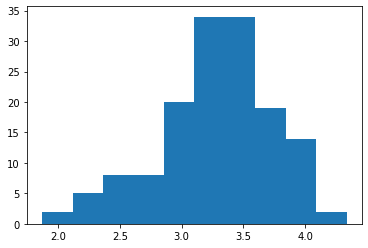

In [24]:
plt.hist(ratings['rating'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

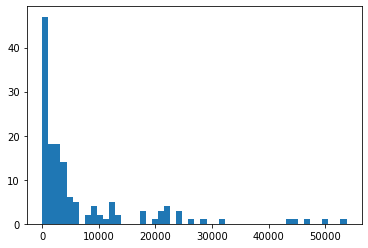

In [25]:
plt.hist(ratings['number of ratings'],bins=50)
plt.show

# Recommender System

# Lets make a pivot table in order to make rows are users and columns are movies & values are rating

In [26]:
pivot_table = movie.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(5)

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
pivot_table.shape

(123161, 146)

Now I will make a function from  which will recommend the movie with their correlation score.Note that higher the correlation more the movie related to each other

In [28]:
def recommend_movie(movie):
    movie_watched = pivot_table[movie]
    similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Toy Story (1995)" and other movies
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head()

In [29]:
recommend_movie('American President, The (1995)')

title
American President, The (1995)    1.000000
Angela (1995)                     0.556186
Sonic Outlaws (1995)              0.554700
Guardian Angel (1994)             0.527257
Nueba Yol (1995)                  0.483607
dtype: float64

In [30]:
recommend_movie('Toy Story (1995)')

title
Toy Story (1995)                                                  1.000000
Gospa (1995)                                                      0.516264
Shadows (Cienie) (1988)                                           0.508859
Happiness Is in the Field (Bonheur est dans le pré, Le) (1995)    0.495360
Across the Sea of Time (1995)                                     0.461406
dtype: float64

In [31]:
recommend_movie('Taxi Driver (1976)')

title
Taxi Driver (1976)       1.000000
Jupiter's Wife (1994)    0.611262
Sonic Outlaws (1995)     0.402730
Target (1995)            0.401574
Catwalk (1996)           0.394233
dtype: float64

In [32]:
recommend_movie('Amazing Panda Adventure, The (1995)')

title
Headless Body in Topless Bar (1995)    1.0
Angela (1995)                          1.0
Guardian Angel (1994)                  1.0
Sonic Outlaws (1995)                   1.0
Amazing Panda Adventure, The (1995)    1.0
dtype: float64

In [33]:
recommend_movie('Vampire in Brooklyn (1995)')

title
Vampire in Brooklyn (1995)                                        1.000000
Headless Body in Topless Bar (1995)                               0.889297
Gospa (1995)                                                      0.866025
Happiness Is in the Field (Bonheur est dans le pré, Le) (1995)    0.745499
Race the Sun (1996)                                               0.697001
dtype: float64

It can be concluded that we need to recommend "Angela (1995)" movie to people who watched "American President, The (1995)".

It can be concluded that we need to recommend "Gospa (1995)" movie to people who watched "Toy Story (1995)".

It can be concluded that we need to recommend "Jupiter's Wife (1994)" movie to people who watched "Taxi Driver (1976)" ETC..

# 